<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h2 style="color: #FF8C00;">Instructions:</h2>

- **Collaboration**: You are working in **pairs**, so collaborate to create a comprehensive `README` file that outlines your project, methodologies, and findings.
- **Presentation**: Prepare and deliver a presentation that summarizes your analysis, demonstrating the depth and breadth of your work.
- **Python scripts**: You can use the this notebook or the `EDA_template` as template for your findings, but you'll have to deliver a different notebook to GitHub.
- **Extended Analysis**: Dive deeper into the data to uncover additional insights. Push the boundaries of your analysis to explore complex interactions within the portfolio.

<h1 style="color: #FF8C00;">Libraries</h1>

<h3 style="color: #FF6347;">-- Insert your code here --</h3>

---

Make sure to import all the libraries you will need to complete your tasks in this challenge.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

<h3 style="color: #FF6347;">Data Loading</h3>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [3]:
asset_price=pd.read_csv('asset_price_data.csv')
asset_price

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13
...,...,...,...,...,...,...
778,2021-12-27,249.9207,103.956,38.820000,NaN,70.11
779,2021-12-28,249.9368,104.526,39.115000,NaN,70.03
780,2021-12-29,248.7215,104.360,38.855000,342.46,69.81
781,2021-12-30,248.5485,104.663,38.985000,342.55,69.91


In [4]:
asset_price= asset_price.interpolate(method='linear', limit_direction='both')
asset_price

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13
...,...,...,...,...,...,...
778,2021-12-27,249.9207,103.956,38.820000,342.42,70.11
779,2021-12-28,249.9368,104.526,39.115000,342.44,70.03
780,2021-12-29,248.7215,104.360,38.855000,342.46,69.81
781,2021-12-30,248.5485,104.663,38.985000,342.55,69.91


Or we can replace also with ffill or bfill:
asset_price= asset_price.fillna(method='ffill')
asset_price

In [5]:
asset_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    783 non-null    object 
 1   Asset1  783 non-null    float64
 2   Asset2  783 non-null    float64
 3   Asset3  783 non-null    float64
 4   Asset4  783 non-null    float64
 5   Asset5  783 non-null    float64
dtypes: float64(5), object(1)
memory usage: 36.8+ KB


In [6]:
asset_price.shape

(783, 6)

In [7]:
asset_price.duplicated().sum()

0

In [8]:
asset_price.eq(" ").sum()

date      0
Asset1    0
Asset2    0
Asset3    0
Asset4    0
Asset5    0
dtype: int64

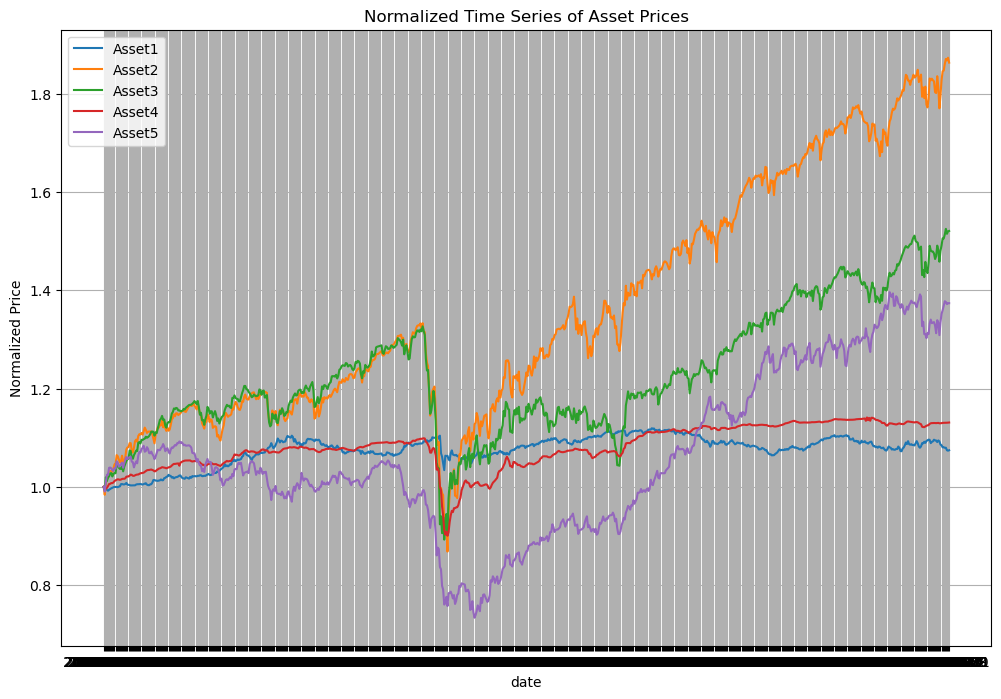

In [9]:
normalized_asset_price = asset_price.copy()
for column in normalized_asset_price.columns[1:]:  # Assuming the first column is timestamp
    normalized_asset_price[column] = normalized_asset_price[column] / normalized_asset_price[column][0]

# Plot the time series
plt.figure(figsize=(12, 8))
for column in normalized_asset_price.columns[1:]:
    plt.plot(normalized_asset_price['date'], normalized_asset_price[column], label=column)

plt.xlabel('date')
plt.ylabel('Normalized Price')
plt.title('Normalized Time Series of Asset Prices')
plt.legend()
plt.grid(True)
plt.show()

Normalized data refers to a dataset where the values have been adjusted or rescaled to a common scale or range.

In the context of time series data visualization, normalizing the data ensures that all asset price series start at the same initial value. This is particularly useful when comparing the trends of multiple assets over time, as it allows you to focus on relative changes rather than absolute values.

<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [10]:
returns_data = asset_price.copy()
returns_data.set_index('date', inplace=True)  
returns_data = returns_data.pct_change()
returns_data.dropna(inplace=True)
returns_data.head()

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-03,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2019-01-04,-0.002740,0.020954,0.025255,-0.001125,0.019242
2019-01-07,-0.001512,0.012632,-0.007338,0.001856,0.014792
2019-01-08,-0.001535,0.001003,0.007040,0.003605,-0.000192
2019-01-09,0.001976,0.012919,0.002272,0.004120,0.014003


<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [11]:
correlation_assets=returns_data.corr()
correlation_assets

,Asset1,Asset2,Asset3,Asset4,Asset5
Asset1,1.000000,-0.089023,-0.062727,0.107833,-0.108488
Asset2,-0.089023,1.000000,0.852473,0.531493,0.591387
Asset3,-0.062727,0.852473,1.000000,0.516387,0.557544
Asset4,0.107833,0.531493,0.516387,1.000000,0.429011
Asset5,-0.108488,0.591387,0.557544,0.429011,1.000000


Correlation coefficients range from -1 to 1.

A correlation coefficient of 1 indicates a perfect positive correlation.
A correlation coefficient of -1 indicates a perfect negative correlation.

The closer the correlation coefficient is to 1 or -1, the stronger the correlation.

A correlation coefficient of 0 indicates no linear relationship between the variables.Values closer to 0 indicate weaker correlations.

Positive correlation: When one variable increases, the other tends to increase as well.

Negative correlation: When one variable increases, the other tends to decrease.


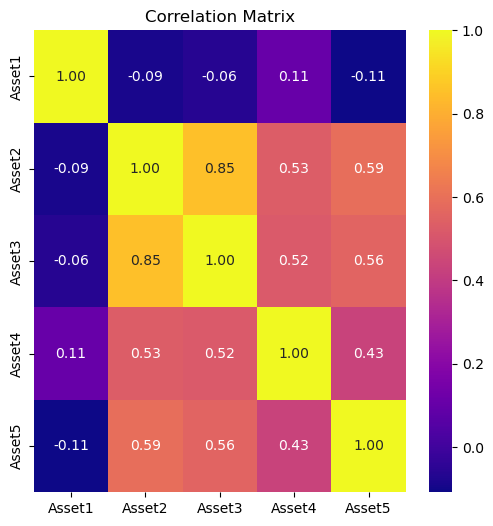

In [18]:
mask = np.zeros_like(correlation_assets)
mask[np.triu_indices_from(mask)]
sns.heatmap(correlation_assets, annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

<Axes: xlabel='Asset1', ylabel='Asset2'>

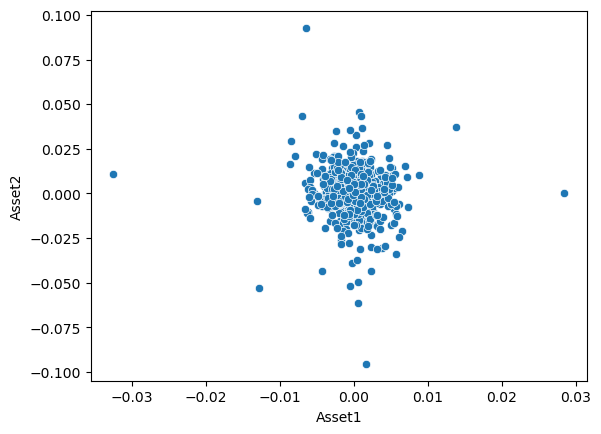

In [34]:
#Let's choose the asset 1 and asset 2
sns.scatterplot(data=returns_data, x='Asset1', y='Asset2')

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [107]:
portfolio_weights = pd.read_csv("portfolio_weights.csv")
portfolio_weights

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974
...,...,...,...,...,...,...
778,2021-12-27,0.071307,0.266093,0.168775,0.33547,0.158356
779,2021-12-28,0.071307,0.266093,0.168775,0.33547,0.158356
780,2021-12-29,0.071307,0.266093,0.168775,0.33547,0.158356
781,2021-12-30,0.071307,0.266093,0.168775,0.33547,0.158356


<Figure size 1000x600 with 0 Axes>

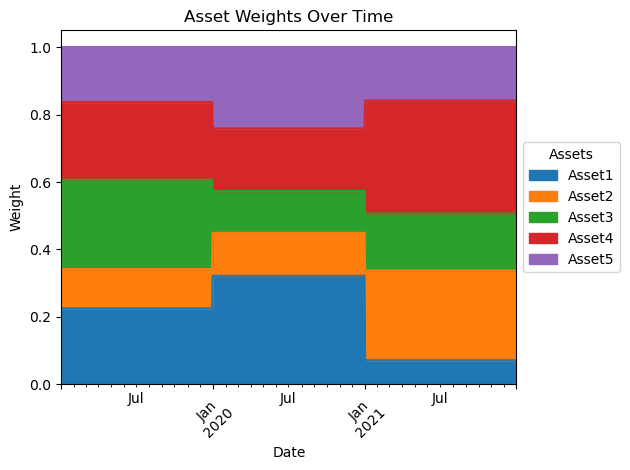

In [72]:
plt.figure(figsize=(10, 6))
portfolio_weights.plot.area(stacked=True)
plt.title('Asset Weights Over Time')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Weight')
plt.legend(title='Assets', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

<Figure size 1000x600 with 0 Axes>

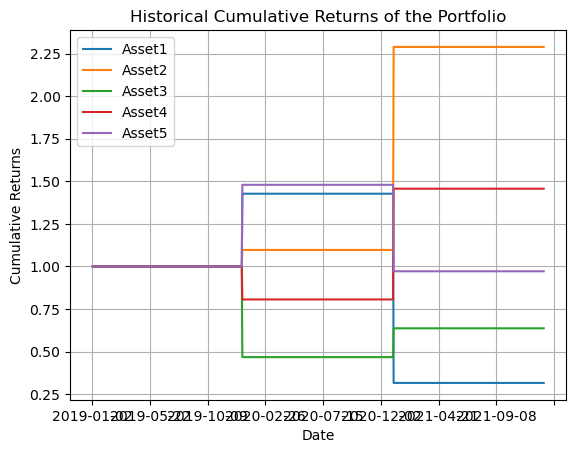

In [113]:
weights_returns = (returns_data * portfolio_weights).sum(axis=1)
cumulative_returns = (1 + portfolio_returns).cumprod()

plt.figure(figsize=(10, 6))
cumulative_returns.plot()
plt.title('Historical Cumulative Returns of the Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)

The line plot shows the trend of cumulative returns over time. As the line moves upwards, it indicates an increase in cumulative returns, meaning the portfolio is earning positive returns. Conversely, if the line moves downwards, it indicates a decrease in cumulative returns, implying negative returns.

<h2 style="color: #FF6347;">Annualized Return.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [115]:
weighted_daily_returns = (portfolio_weights * returns_data).sum(axis=1)

total_return = cumulative_returns.iloc[-1] - 1
number_of_years = len(cumulative_returns) / 365  # 365 days/year
annualized_return = (1 + total_return) ** (1 / number_of_years) - 1

annualized_return

Asset1   -0.415273
Asset2    0.471092
Asset3   -0.189674
Asset4    0.191633
Asset5   -0.013313
Name: 2021-12-31, dtype: float64

<h2 style="color: #FF6347;">Annualized Volatility.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [103]:
daily_returns = cumulative_returns.pct_change().dropna()

daily_volatility = daily_returns.std()

annualization_factor = np.sqrt(261) 
annualized_volatility = daily_volatility * annualization_factor

print("Annualized Volatility of the Portfolio:")
print(annualized_volatility)

Annualized Volatility of the Portfolio:
Asset1    0.513534
Asset2    0.630538
Asset3    0.372273
Asset4    0.479652
Asset5    0.340966
dtype: float64


<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [104]:
asset_info = pd.read_csv("asset_information_data.csv")
asset_info

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative
